Pobierz dane dotyczące scoringu kredytowego

*Pracujesz jako analityk danych w globalnej firmie finansowej. Przez lata firma gromadziła podstawowe dane bankowe i wiele informacji związanych z kredytami. Kierownictwo chce zbudować inteligentny system do segregowania ludzi w przedziałach oceny kredytowej, aby zmniejszyć wysiłek ręczny.*

**Zadanie na dziś: przygotować dane do modelu**

In [34]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

import danych

In [35]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,
)

print("First 5 records:", df.head())

<ipython-input-35-db52f5663265>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,


First 5 records:        ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utiliz

/usr/local/lib/python3.11/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


**Poznaj dane:**

1.   sprawdź wymiary i typy kolumn
2.   usuń duplikaty
3.   usuń zdbędne kolumny
4.   sprawdz liczbę braków danych w poszczególnych kolumnach






In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [37]:
df.drop_duplicates(inplace=True)

Usuń kolumny, które nie będą wykorzystywane w analizie ['ID','Customer_ID','SSN','Name']

In [38]:
df.drop(['ID','Customer_ID','SSN','Name'], axis=1, inplace=True)
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


usuń niektore z zbędnych znakow ('_','-'), zmień puste komorki na nan

In [39]:
for col in df.columns:
    df[col] = df[col].astype(str).str.replace('_', ' ')
    df[col] = df[col].astype(str).str.replace('-', ' ')
    df[col] = df[col].replace('nan', np.nan)
    df[col] = df[col].replace('', np.nan)

df.head()


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,"Auto Loan, Credit Builder Loan, Personal Loan,...",...,,809.98,26.822619623699016,22 Years and 1 Months,No,49.57494921489417,80.41529543900253,High spent Small value payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit Builder Loan, Personal Loan,...",...,Good,809.98,31.94496005538421,NaN,No,49.57494921489417,118.28022162236736,Low spent Large value payments,284.62916249607184,Good
2,March,500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit Builder Loan, Personal Loan,...",...,Good,809.98,28.60935202206993,22 Years and 3 Months,No,49.57494921489417,81.699521264648,Low spent Medium value payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit Builder Loan, Personal Loan,...",...,Good,809.98,31.377861869582357,22 Years and 4 Months,No,49.57494921489417,199.4580743910713,Low spent Small value payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,"Auto Loan, Credit Builder Loan, Personal Loan,...",...,Good,809.98,24.797346908844982,22 Years and 5 Months,No,49.57494921489417,41.420153086217326,High spent Medium value payments,341.48923103222177,Good


Zmień nazwy miesiecy na zmienne liczbowe zgodnie z kolejnością miesięcy

In [40]:
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

if df['Month'].dtype == 'object':
    df['Month'] = df['Month'].map(month_mapping)
    df['Month'].fillna(0, inplace=True)
    df['Month'] = df['Month'].astype(int)
else:
    print("Column 'Month' is not of type object.Check the data")
df.head()






<ipython-input-40-62fafdb6eb76>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Month'].fillna(0, inplace=True)


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,"Auto Loan, Credit Builder Loan, Personal Loan,...",...,,809.98,26.822619623699016,22 Years and 1 Months,No,49.57494921489417,80.41529543900253,High spent Small value payments,312.49408867943663,Good
1,2,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit Builder Loan, Personal Loan,...",...,Good,809.98,31.94496005538421,NaN,No,49.57494921489417,118.28022162236736,Low spent Large value payments,284.62916249607184,Good
2,3,500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit Builder Loan, Personal Loan,...",...,Good,809.98,28.60935202206993,22 Years and 3 Months,No,49.57494921489417,81.699521264648,Low spent Medium value payments,331.2098628537912,Good
3,4,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit Builder Loan, Personal Loan,...",...,Good,809.98,31.377861869582357,22 Years and 4 Months,No,49.57494921489417,199.4580743910713,Low spent Small value payments,223.45130972736786,Good
4,5,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,"Auto Loan, Credit Builder Loan, Personal Loan,...",...,Good,809.98,24.797346908844982,22 Years and 5 Months,No,49.57494921489417,41.420153086217326,High spent Medium value payments,341.48923103222177,Good


Zakoduj zmienne tekstowe: 'Occupation', 'Type_of_Loan', 'Payment_Behaviour', 'Credit_Mix', użyj LabelEncodera

In [41]:
label_encoder = LabelEncoder()

for column in ['Occupation', 'Type_of_Loan', 'Payment_Behaviour', 'Credit_Mix']:
    df[column] = label_encoder.fit_transform(df[column].astype(str))


Przelicz kolumne Credit_History_Age na liczbę mięsiecy


In [42]:
def convert_credit_history_age(age_str):
    if pd.isna(age_str) or not isinstance(age_str, str):
        return np.nan
    try:
        parts = age_str.split(' and ')
        years = int(parts[0].split(' ')[0])
        months = int(parts[1].split(' ')[0])
        return years * 12 + months
    except (ValueError, IndexError):
        return np.nan

df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(convert_credit_history_age)

df.drop('Credit_History_Age', axis=1, inplace=True)


In [44]:
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('')
# Convert the 'Type_of_Loan' column back to string type
df['Type_of_Loan'] = df['Type_of_Loan'].astype(str)
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(r'\band\b', '', regex=True).str.strip() #removes "and"

# Split and clean the values
df_type_of_loan = df['Type_of_Loan'].str.split(r',\s*')  # Handles different spacing

# Use MultiLabelBinarizer
mlb = MultiLabelBinarizer()
dt = mlb.fit_transform(df_type_of_loan.to_list())  # Ensure correct format

# Convert to DataFrame
encoded_df = pd.DataFrame(data=dt, columns=mlb.classes_)

# Merge with original DataFrame and drop old column
df = df.join(encoded_df).drop(columns=['Type_of_Loan'])

print(df.head())

   Month   Age  Occupation Annual_Income Monthly_Inhand_Salary  \
0      1    23          13      19114.12    1824.8433333333328   
1      2    23          13      19114.12                   NaN   
2      3   500          13      19114.12                   NaN   
3      4    23          13      19114.12                   NaN   
4      5    23          13      19114.12    1824.8433333333328   

  Num_Bank_Accounts Num_Credit_Card Interest_Rate Num_of_Loan  \
0                 3               4             3           4   
1                 3               4             3           4   
2                 3               4             3           4   
3                 3               4             3           4   
4                 3               4             3           4   

  Delay_from_due_date  ... 990 991 992  993 994 995 996 997 998  999  
0                   3  ...   0   0   0    0   0   0   0   0   0    0  
1                   1  ...   0   0   0    0   0   0   0   0   0    0  

Zmien inne zmienne na numeryczne

In [45]:
for col in ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
            'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
            'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age_Months',
            'Amount_invested_monthly', 'Monthly_Balance']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 6284 entries, Month to 999
dtypes: float64(9), int64(6270), object(5)
memory usage: 4.7+ GB
None


Uzupełnij braki w kolumnie Monthly_Inhand_Salary,  Annual_Income, .. średnią

In [46]:
for col in ['Monthly_Inhand_Salary', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age_Months', 'Amount_invested_monthly']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)
df.head()

<ipython-input-46-90555d4c9344>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,990,991,992,993,994,995,996,997,998,999
0,1,23,13,19114.12,1824.843333,3,4,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1,2,23,13,19114.12,4194.170850,3,4,3,4,1,...,0,0,0,0,0,0,0,0,0,0
2,3,500,13,19114.12,4194.170850,3,4,3,4,3,...,0,0,0,0,0,0,0,0,0,0
3,4,23,13,19114.12,4194.170850,3,4,3,4,5,...,0,0,0,0,0,0,0,0,0,0
4,5,23,13,19114.12,1824.843333,3,4,3,4,6,...,0,0,0,0,0,0,0,0,0,0


Narysuj rozkłady zmiennych 'Annual_Income', 'Monthly_Balance'

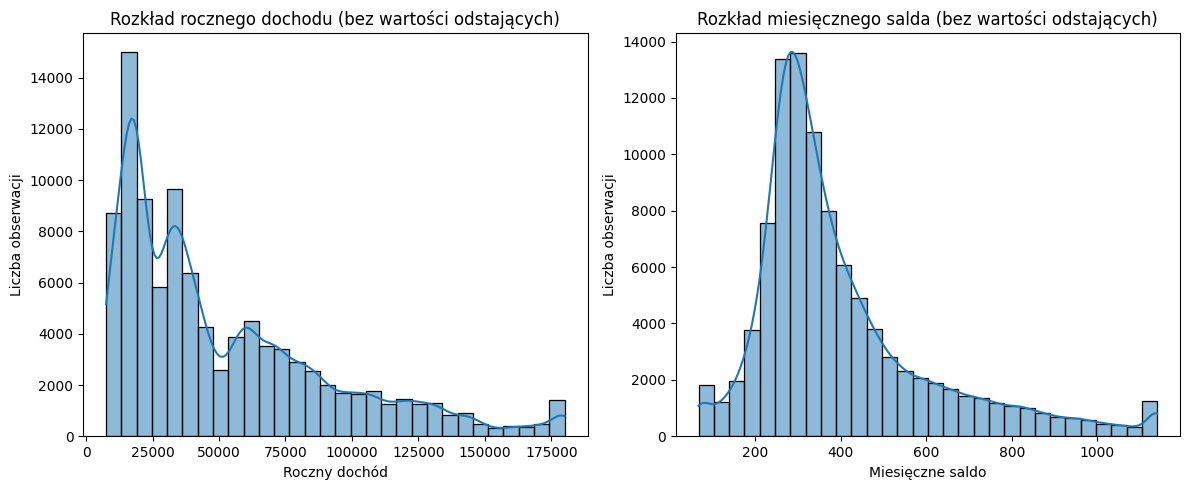

In [50]:
# Wizualizacja rozkładów 'Annual_Income' i 'Monthly_Balance'
plt.figure(figsize=(12, 5))

# Najpierw upewnij się, że dane są numeryczne
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

# Usuń wartości odstające przed wizualizacją
def clip_outliers(series, percentile_low=0.01, percentile_high=0.99):
    """Przytnij wartości do zakresu między dolnym a górnym percentylem"""
    if series.count() > 0:
        low = series.quantile(percentile_low)
        high = series.quantile(percentile_high)
        return series.clip(low, high)
    return series

# Rozkład Annual_Income z ograniczonym zakresem
plt.subplot(1, 2, 1)
clipped_income = clip_outliers(df['Annual_Income'].dropna())
sns.histplot(clipped_income, kde=True, bins=30)
plt.title('Rozkład rocznego dochodu (bez wartości odstających)')
plt.xlabel('Roczny dochód')
plt.ylabel('Liczba obserwacji')

# Rozkład Monthly_Balance z ograniczonym zakresem
plt.subplot(1, 2, 2)
clipped_balance = clip_outliers(df['Monthly_Balance'].dropna())
sns.histplot(clipped_balance, kde=True, bins=30)
plt.title('Rozkład miesięcznego salda (bez wartości odstających)')
plt.xlabel('Miesięczne saldo')
plt.ylabel('Liczba obserwacji')

plt.tight_layout()
plt.show()


usuń wartości odstające (w przypadku wieku wszystkie ujemne i te powyzej 100 lat)

In [52]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,990,991,992,993,994,995,996,997,998,999
0,1,23,13,19114.12,1824.843333,3,4,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1,2,23,13,19114.12,4194.170850,3,4,3,4,1,...,0,0,0,0,0,0,0,0,0,0
3,4,23,13,19114.12,4194.170850,3,4,3,4,5,...,0,0,0,0,0,0,0,0,0,0
4,5,23,13,19114.12,1824.843333,3,4,3,4,6,...,0,0,0,0,0,0,0,0,0,0
5,6,23,13,19114.12,4194.170850,3,4,3,4,8,...,0,0,0,0,0,0,0,0,0,0


Zwizualizuj korelacje między zmiennymi

In [ ]:
# Wizualizacja korelacji między zmiennymi
# Wybierz tylko kolumny numeryczne
numeric_df = df.select_dtypes(include=[np.number])

# Oblicz macierz korelacji
corr_matrix = numeric_df.corr()

# Wizualizacja jako heatmapa
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Macierz korelacji zmiennych numerycznych')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Dodatkowo wyświetl najwyższe korelacje z docelową zmienną (jeśli istnieje)
if 'Credit_Score' in numeric_df.columns:
    target_corr = corr_matrix['Credit_Score'].sort_values(ascending=False)
    print("Najważniejsze korelacje ze zmienną Credit_Score:")
    print(target_corr)